In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
import plotly.io as pio
import plotly.graph_objects as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_classification

# 1) Business Understanding

As a self-diagnosed chocoholic and general fan of chocolate of all kinds, finding this dataset and drawing conclusions from it is a joy for me. 

The dataset gathered includes ratings from experts of 1,795 chocolate bars.  I am interested in extracting the following questions from the dataset:

_1) Is there a relationship between highly rated chocolate and its cacao bean source? eg. Where are the best beans from?_

_2) Does cacao percent in a chocolate bar equate to higher ratings?_

_3) Is company location correlated with ratings?_

_4) What is the world's best chocolate bar?_

_5) What is the linear model for this data, with Rating as the output (y)?_

**GATHER** Gathering 'Flavors of Cacao' Kaggle Dataset into Pandas DataFrame

In [4]:
df = pd.read_csv('flavors_of_cacao.csv', dtype=str)
df.head(5) #Display first 5 rows

,Company \n(Maker-if known),Specific Bean Origin\nor Bar Name,REF,Review\nDate,Cocoa\nPercent,Company\nLocation,Rating,Bean\nType,Broad Bean\nOrigin
0,A. Morin,Agua Grande,1876,2016,63%,France,3.75,,Sao Tome
1,A. Morin,Kpime,1676,2015,70%,France,2.75,,Togo
2,A. Morin,Atsane,1676,2015,70%,France,3,,Togo
3,A. Morin,Akata,1680,2015,70%,France,3.5,,Togo
4,A. Morin,Quilla,1704,2015,70%,France,3.5,,Peru


# 2) Data Understanding

**ACCESS**

In [5]:
num_rows = df.shape[0]
num_rows

1795

In [6]:
#Let's clean up the column titles.

df.columns = [label.replace('\n', '_') for label in df.columns]
df.head()

,Company _(Maker-if known),Specific Bean Origin_or Bar Name,REF,Review_Date,Cocoa_Percent,Company_Location,Rating,Bean_Type,Broad Bean_Origin
0,A. Morin,Agua Grande,1876,2016,63%,France,3.75,,Sao Tome
1,A. Morin,Kpime,1676,2015,70%,France,2.75,,Togo
2,A. Morin,Atsane,1676,2015,70%,France,3,,Togo
3,A. Morin,Akata,1680,2015,70%,France,3.5,,Togo
4,A. Morin,Quilla,1704,2015,70%,France,3.5,,Peru


In [7]:
df.describe()

,Company _(Maker-if known),Specific Bean Origin_or Bar Name,REF,Review_Date,Cocoa_Percent,Company_Location,Rating,Bean_Type,Broad Bean_Origin
count,1795,1795,1795,1795,1795,1795,1795,1794,1794
unique,416,1039,440,12,45,60,13,41,100
top,Soma,Madagascar,414,2015,70%,U.S.A.,3.5,,Venezuela
freq,47,57,10,285,672,764,392,887,214


# 3) Data Preparation

**CLEAN**

Here are the cleaning objectives for this dataset:

_1) Convert columns from object to float/int when applicable_

_2) Drop any columns with major missing values (like Rating)_

_3) Fill NaN values using appropriate imputation methods_

_**Note that items 2 and 3 will be completed in the function (with DocString) 'clean_data'**_

In [8]:
# 1) Let's convert Rating into a Rating_Float column so we have a proper response vector.

df['Rating_Float'] = pd.to_numeric(df['Rating'], downcast='float')
df['Rating_Float'].dtype #Confirming this new column is 32-bit Float

dtype('float32')

In [9]:
# 1) Continued, converting 'Cocoa_Percent' 
df['Cocoa_Pct_Float'] = df.apply(lambda x: x['Cocoa_Percent'][:2], axis=1)
df['Cocoa_Pct_Float'] = pd.to_numeric(df['Cocoa_Pct_Float'], downcast='float')
df['Cocoa_Pct_Float'].dtype

dtype('float32')

In [10]:
# Let's make sure the data frame looks like we want it to:
df.head(5)

,Company _(Maker-if known),Specific Bean Origin_or Bar Name,REF,Review_Date,Cocoa_Percent,Company_Location,Rating,Bean_Type,Broad Bean_Origin,Rating_Float,Cocoa_Pct_Float
0,A. Morin,Agua Grande,1876,2016,63%,France,3.75,,Sao Tome,3.75,63.0
1,A. Morin,Kpime,1676,2015,70%,France,2.75,,Togo,2.75,70.0
2,A. Morin,Atsane,1676,2015,70%,France,3,,Togo,3.00,70.0
3,A. Morin,Akata,1680,2015,70%,France,3.5,,Togo,3.50,70.0
4,A. Morin,Quilla,1704,2015,70%,France,3.5,,Peru,3.50,70.0


In [11]:
df['Specific Bean Origin_or Bar Name'].isnull().mean()

0.0

In [155]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1795 entries, 0 to 1794
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Company _(Maker-if known)         1795 non-null   object 
 1   Specific Bean Origin_or Bar Name  1795 non-null   object 
 2   REF                               1795 non-null   object 
 3   Review_Date                       1795 non-null   object 
 4   Cocoa_Percent                     1795 non-null   object 
 5   Company_Location                  1795 non-null   object 
 6   Rating                            1795 non-null   object 
 7   Bean_Type                         1794 non-null   object 
 8   Broad Bean_Origin                 1794 non-null   object 
 9   Rating_Float                      1795 non-null   float32
 10  Cocoa_Pct_Float                   1795 non-null   float32
dtypes: float32(2), object(9)
memory usage: 140.4+ KB


In [207]:
def clean_data(df):
    '''
    INPUT
    df - Chocolate DataFrame
    
    OUTPUT
    X - All factors contributing to linear model
    y - Dependent variable (response)
    '''
    # Drop rows with missing salary values
    model_df = df
    
    model_df = model_df.dropna(subset=['Rating_Float'], axis=0)
    y = model_df['Rating_Float']
    
    model_df = model_df.drop(['REF', 'Review_Date','Rating_Float', 'Cocoa_Percent', 'Rating', 'Bean_Type', 'Company\xa0_(Maker-if known)', 'Broad Bean_Origin', 'Specific Bean Origin_or Bar Name'], axis=1)
    
    # Fill numeric columns with the mean
    num_vars = model_df.select_dtypes(include=['float', 'int']).columns
    for col in num_vars:
        df[col].fillna((model_df[col].mean()), inplace=True)
    
    #Dummy the categorical variables
    cat_vars = model_df.select_dtypes(include=['object']).copy().columns
    for var in  cat_vars:
        #for each cat add dummy var, drop original column
        model_df = pd.concat([model_df.drop(var, axis=1), pd.get_dummies(model_df[var], prefix=var, prefix_sep='_', drop_first=True)], axis=1)
    
    X = model_df
    return X, y
    
#Use the function to create X and y
X, y = clean_data(df)    

In [208]:
#We will use X and y below in the analysis section to compute a linear model.

X, y = clean_data(df)      

In [209]:
df['Cocoa_Pct_Float'].mean()

70.69359588623047

# 4) Answer Questions

**ANALYZE**

**Is there a relationship between highly rated chocolate and its cacao bean source? eg. Where are the best beans from?**

In [24]:
#Let's group by Broad Bean Origin

groupby_origin = df.groupby('Broad Bean_Origin').mean()['Rating_Float']
df_groupby_origin = pd.DataFrame(groupby_origin)
df_groupby_origin.reset_index()

df_groupby_origin[df_groupby_origin['Rating_Float'] == df_groupby_origin['Rating_Float'].max()] 

,Rating_Float
Broad Bean_Origin,
"Dom. Rep., Madagascar",4.0
"Gre., PNG, Haw., Haiti, Mad",4.0
"Guat., D.R., Peru, Mad., PNG",4.0
"Peru, Dom. Rep",4.0
"Ven, Bolivia, D.R.",4.0
"Venezuela, Java",4.0


Great! Now we know that the chocolate with the highest ratings uses beans sourced from the Dominican Republic, Madagascar, Peru, Venezuela, Haiti, Guatemala, etc.

**Does cacao percent in a chocolate bar equate to higher ratings?**

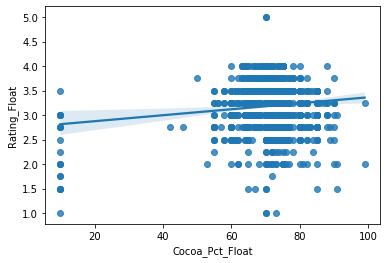

In [25]:
sns.regplot(x='Cocoa_Pct_Float', y='Rating_Float', data=df, label = 'Legend')

Modest increases in ratings are seen when the percent cacao is increased. However, these data suggest that it's impossible to get higher than a 3.5 rating out of 5 if you have less than 20% cacao in the chocolate.

**Is company location correlated with ratings?**

In [26]:
#Let's group by Company Location

df_comp = df.groupby('Company_Location').mean()['Rating_Float']
df_comp = pd.DataFrame(df_comp)
df_comp.reset_index(level=0, inplace=True)
df_comp.head(10)

,Company_Location,Rating_Float
0,Amsterdam,3.500000
1,Argentina,3.305556
2,Australia,3.357143
3,Austria,3.240385
4,Belgium,3.093750
5,Bolivia,3.250000
6,Brazil,3.397059
7,Canada,3.324000
8,Chile,3.750000
9,Colombia,3.173913


See the **"VISUALIZE"** section below for a more detailed answer to this question.

**What is the world's best chocolate bar?**

In [27]:
#What is the absolute highest rating in the dataset?
df[df['Rating_Float'] == df['Rating_Float'].max()] 

,Company _(Maker-if known),Specific Bean Origin_or Bar Name,REF,Review_Date,Cocoa_Percent,Company_Location,Rating,Bean_Type,Broad Bean_Origin,Rating_Float,Cocoa_Pct_Float
78,Amedei,Chuao,111,2007,70%,Italy,5,Trinitario,Venezuela,5.0,70.0
86,Amedei,Toscano Black,40,2006,70%,Italy,5,Blend,,5.0,70.0


We can see above that the best chocolate bars in the world are from Italian chocolate manufacturer **_Amadei: Toscano Black and Chuao._**

**VISUALIZE**

In [122]:
df_bean_type = df.groupby('Bean_Type').mean()['Rating_Float']
df_bean_type = pd.DataFrame(df_bean_type)
df_bean_type.reset_index(level=0, inplace=True)

In [123]:
def sns_barplot(x_column, y_column, df, x_axis, title_s):
    '''
    This function will plot a seaborn barplot based on which chocolate element we are interested in.
    
    INPUT:
    x_column: the independent variable (column) we wish to plot on the x axis
    y_column: the dependent result variable (column) to plot on the y axis
    df: the dataframe containing the information we want to graph
    x_axis (string): title of x axis
    title_s (string): title of the graph itself.
    
    OUTPUT:
    A seaborn plot with the top 10 highest rated rows in order.
    '''
    df_sort = df.sort_values(by = [y_column], axis=0, ascending=False)
    
    sns.set(style="whitegrid")
    ax = sns.barplot(x = x_column, y = y_column, data = df_sort.head(10))
    ax.set(xlabel = x_axis, ylabel = "Average Rating (out of 5)", title = title_s)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

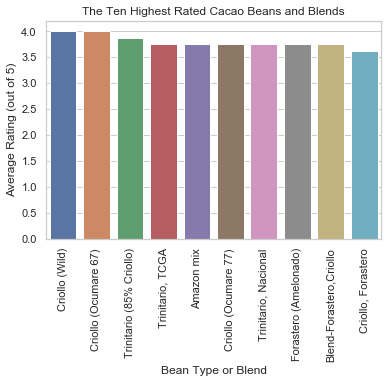

In [124]:
sns_barplot('Bean_Type', 'Rating_Float', df_bean_type, 'Bean Type or Blend','The Ten Highest Rated Cacao Beans and Blends')

See above for the top 10 highest rated bean types from the dataset.

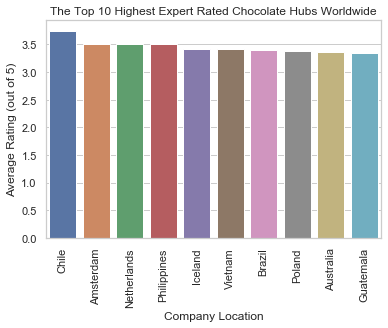

In [125]:
sns_barplot('Company_Location', 'Rating_Float', df_comp, 'Company Location', 'The Top 10 Highest Expert Rated Chocolate Hubs Worldwide')

30% of the top 10 highest rated chocolate hubs are in South/Central America, with the best rated chocolate in Chile. The best chocolate bar in the world is from an Italian chocolatier, but interestingly, Italy did not make the list of the top 10 best chocolate hubs per chart above.

# 5) Modeling

**What is the linear model for this data, with Rating as the output (y)? What can we determine from the linear model?**

In [203]:
#We cleaned the data in DATA PREPARATION section and established X and y.  Here is the linear model.

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.30, random_state=42)

lm_model = LinearRegression(normalize=True) #Instantiate
lm_model.fit(X_train, y_train)

#Predict using model
y_test_preds = lm_model.predict(X_test)
y_train_preds = lm_model.predict(X_train)

#Score using model
test_score = r2_score(y_test, y_test_preds)
train_score = r2_score(y_train, y_train_preds)

In [204]:
test_score

-4027900328.2613406

In [205]:
train_score

0.0829156989884321

# 6) Evaluation

In [193]:
#Model Evaluation and Feature Review:



Limitations of Data and Further Questions:

_1) Some of these ratings are old.  For example, the Amedei Toscano Black rating took place in 2006._


_2)_

In [213]:
def coef_sig(coefficients, X_train):
    '''
    INPUT:
    coefficients - linear model coefficients defined above.
    X_train - the training data, so the column names can be used
    OUTPUT:
    coefs_df - a dataframe holding the coefficient, estimate, and abs(estimate)
    
    Provides a dataframe that can be used to understand the most influential coefficients
    in a linear model by providing the coefficient estimates along with the name of the 
    variable attached to the coefficient.
    '''
    coefs_df = pd.DataFrame()
    coefs_df['est_int'] = X_train.columns
    coefs_df['coefs'] = lm_model.coef_
    coefs_df['absolute_coefs'] = np.abs(lm_model.coef_)
    coefs_df = coefs_df.sort_values('absolute_coefs', ascending=False)
    return coefs_df

#Use the function
coef_df = coef_sig(lm_model.coef_, X_train)

#A quick look at the top results
coef_df.head(20)

,est_int,coefs,absolute_coefs
20,Company_Location_Ghana,-691623.625000,691623.625000
26,Company_Location_India,-0.913752,0.913752
43,Company_Location_Puerto Rico,-0.823390,0.823390
42,Company_Location_Portugal,-0.800445,0.800445
48,Company_Location_South Africa,-0.792743,0.792743
34,Company_Location_Mexico,-0.784912,0.784912
37,Company_Location_Niacragua,-0.780816,0.780816
59,Company_Location_Wales,-0.780124,0.780124
21,Company_Location_Grenada,-0.664072,0.664072
11,Company_Location_Czech Republic,-0.663040,0.663040
